# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

###Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.


### Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


# **1. Data Exploration and Preprocessing:**


### **Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).**

In [1]:
#!pip install ppscore

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [3]:
df = pd.read_csv('/content/adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Categorical and Numerical columns lists
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

### **Handle missing values as per the best practices (imputation, removal, etc.).**

In [5]:
# Check what are the unique values in categorical columns
for col in cat_cols:
    print('Column :', col)
    print(df[col].unique())
    print(df[col].value_counts())
    print('---------------------------------')

Column : workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
---------------------------------
Column : education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           

All the entries in categorical columns are having extra space before the first letter, so we will remove it by applying **.replace** method

In [6]:
df[cat_cols] = df[cat_cols].applymap(lambda x: x.replace(' ', ''))

Some columns contains "?" at some places, means those entries are invalid, we will replace those invalid entries by **NaN**

In [7]:
df.replace('?',np.nan, inplace=True)

In [8]:
for col in cat_cols:
    print('Column :', col)
    print(df[col].unique())
    print(df[col].value_counts())
    print('---------------------------------')

Column : workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
---------------------------------
Column : education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
-------------------

In [9]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Columns "workclass", "occupation" and "native_country" are having NaN entries, so we will replace them by modes of corresponding columns

In [10]:
df.fillna(df['workclass'].mode()[0], inplace=True)
df.fillna(df['occupation'].mode()[0], inplace=True)
df.fillna(df['native_country'].mode()[0], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From describe for numerical columns we observe the following
* There are no missing values in any column.
* it looks like these columns are having outliers : "fnlwgt","capital_gain".
* All columns are skewed

In [13]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29170,24720


From describe for object columns we observe the following
* Now there are no missing values.
* Most of the people work in Private sector.
* Most of the people are White.
* Almost 90% people are from United-States.
* Almost 75% people are having income less than or equal to 50K.


### **Apply scaling techniques to numerical features:**

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
df_numerical = df.select_dtypes(include='number')
num_cols = df_numerical.columns
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

#### **Standard Scaling**

In [15]:
#Standardization
scaled_num_data1 = df
sc = StandardScaler()
scaled_num_data1[num_cols]= sc.fit_transform(df[num_cols])
scaled_num_data1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


In [16]:
scaled_num_data1.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


In [17]:
scaled_num_data1.describe(include=object)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29170,24720


#### **Min-Max Scaling**

In [18]:
#MinMaxScalar
mn = MinMaxScaler()
df[num_cols] = mn.fit_transform(df[num_cols])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [19]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Where each scaling technique is preferred and why.**

**Standard Scaling (Z-score Normalization)**

**Definition:** Transforms data to have a mean of 0 and a standard deviation of 1.
$Z = \frac{X - \mu}{\sigma}$

**Preferred Scenarios:**

* Algorithms Assuming Normal Distribution: e.g., linear regression, logistic regression.
* Different Feature Distributions: Ensures equal contribution, e.g., SVM, PCA.
* Gradient Descent Algorithms: Faster, more reliable convergence.

---

**Min-Max Scaling (Normalization)**

**Definition:** Transforms data to fit within a specific range, typically [0, 1].
$X'= \frac{X-X_{min}}{X_{max}-X_{min}}$

**Preferred Scenarios:**

* Distribution-Agnostic Algorithms: e.g., k-means clustering, neural networks.
* Same Scale Features: Preserves relationships, useful in distance-based methods.
* Specific Range Requirement: e.g., image processing (pixel values).
Summary
* Standard Scaling: For normal distribution assumptions, handling outliers, and gradient descent.
* Min-Max Scaling: For specific range requirements, distribution-agnostic algorithms, and distance-based methods.

---

* ***We will continue with Min-Max Scaling***

# **2. Encoding Techniques:**

### **Apply One-Hot Encoding to categorical variables with less than 5 categories.**

In [20]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29170,24720


Columns "sex" and "income" are with less than 5 categories, but as "income" column is a target column. We will apply One-Hot Encoding only on "sex" column.

In [21]:
# One-Hot Encoding
df = pd.get_dummies(data=df,columns= ['sex'], dtype= int)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,0.021740,0.0,0.397959,United-States,<=50K,0,1
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,0.122449,United-States,<=50K,0,1
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,0.397959,United-States,<=50K,0,1
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,0.397959,United-States,<=50K,0,1
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,0.397959,Cuba,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,0.000000,0.0,0.377551,United-States,<=50K,1,0
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,0.000000,0.0,0.397959,United-States,>50K,0,1
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,0.000000,0.0,0.397959,United-States,<=50K,1,0
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,0.000000,0.0,0.193878,United-States,<=50K,0,1


### **Use Label Encoding for categorical variables with more than 5 categories.**

We will apply Label ENcoding on following columns alog with target column "workclass","education","marital_status","occupation","relationship","race","sex","native_country","income".

In [22]:
from sklearn import preprocessing
cat_columns = list(df.select_dtypes(include='object').columns)
label_encoder = preprocessing.LabelEncoder()
df[cat_columns] = df[cat_columns].apply(label_encoder.fit_transform)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male
0,0.301370,6,0.044302,9,0.800000,4,0,1,4,0.021740,0.0,0.397959,39,0,0,1
1,0.452055,5,0.048238,9,0.800000,2,3,0,4,0.000000,0.0,0.122449,39,0,0,1
2,0.287671,3,0.138113,11,0.533333,0,5,1,4,0.000000,0.0,0.397959,39,0,0,1
3,0.493151,3,0.151068,1,0.400000,2,5,0,2,0.000000,0.0,0.397959,39,0,0,1
4,0.150685,3,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,3,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,1,0
32557,0.315068,3,0.096500,11,0.533333,2,6,0,4,0.000000,0.0,0.397959,39,1,0,1
32558,0.561644,3,0.094827,11,0.533333,6,0,4,4,0.000000,0.0,0.397959,39,0,1,0
32559,0.068493,3,0.128499,11,0.533333,4,0,3,4,0.000000,0.0,0.193878,39,0,0,1


In [23]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,3.094438,0.120545,10.298210,0.605379,2.611836,6.475477,1.446362,3.665858,0.010777,0.020042,0.402423,37.217162,0.240810,0.330795,0.669205
std,0.186855,1.107194,0.071685,3.870264,0.171515,1.506222,4.357104,1.606771,0.848806,0.073854,0.092507,0.125994,6.328375,0.427581,0.470506,0.470506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,3.000000,0.071679,9.000000,0.533333,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.397959,39.000000,0.000000,0.000000,0.000000
50%,0.273973,3.000000,0.112788,11.000000,0.600000,2.000000,6.000000,1.000000,4.000000,0.000000,0.000000,0.397959,39.000000,0.000000,0.000000,1.000000
75%,0.424658,3.000000,0.152651,12.000000,0.733333,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,0.448980,39.000000,0.000000,1.000000,1.000000
max,1.000000,7.000000,1.000000,15.000000,1.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000


# **3. Feature Engineering:**


### **Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.**

In [24]:
data = pd.read_csv('/content/adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
# Categorical and Numerical columns lists
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=['number']).columns.tolist()

In [26]:
data[cat_cols] = data[cat_cols].applymap(lambda x: x.replace(' ', ''))

* We will create new binary column for marital_status with entries "Maried" and "Unmaried"

In [27]:
data['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [28]:
data.replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse','Never-married','Divorced','Separated','Widowed'],
             ['Married','Married','Married','Unmarried','Unmarried','Unmarried','Unmarried'], inplace=True)

In [29]:
data['marital_status'].value_counts()

Unmarried    17144
Married      15417
Name: marital_status, dtype: int64

In [30]:
data['marital_status'] = np.where(data['marital_status'] == 'Married', 1, 0)

In [31]:
df['marital_status_new'] = data['marital_status']

Also, since most of the people are from United-States, we will create a new binary column "native_country_new" whose entries are either From_US or Not_from_US

In [32]:
data['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [33]:
data['native_country'] = np.where(data['native_country'] == 'United-States', 1, 0)

In [34]:
df['native_country_new'] = data['native_country']

In [35]:
# Drop old columns "marital_status" and "native_country"
df.drop(columns=['marital_status','native_country'], inplace=True)

In [36]:
df.describe()

,age,workclass,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,3.094438,0.120545,10.298210,0.605379,6.475477,1.446362,3.665858,0.010777,0.020042,0.402423,0.240810,0.330795,0.669205,0.473481,0.895857
std,0.186855,1.107194,0.071685,3.870264,0.171515,4.357104,1.606771,0.848806,0.073854,0.092507,0.125994,0.427581,0.470506,0.470506,0.499304,0.305451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,3.000000,0.071679,9.000000,0.533333,3.000000,0.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.273973,3.000000,0.112788,11.000000,0.600000,6.000000,1.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.424658,3.000000,0.152651,12.000000,0.733333,10.000000,3.000000,4.000000,0.000000,0.000000,0.448980,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,7.000000,1.000000,15.000000,1.000000,14.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.**

Column: age


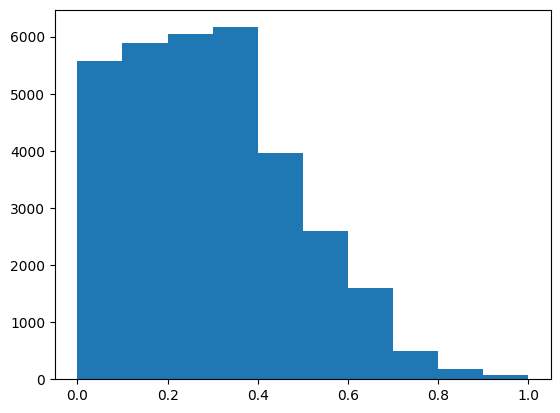

Column: workclass


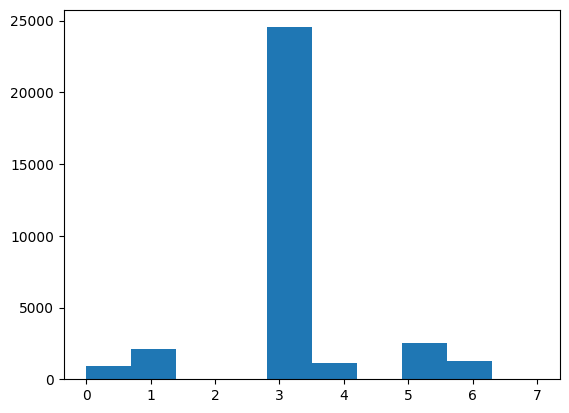

Column: fnlwgt


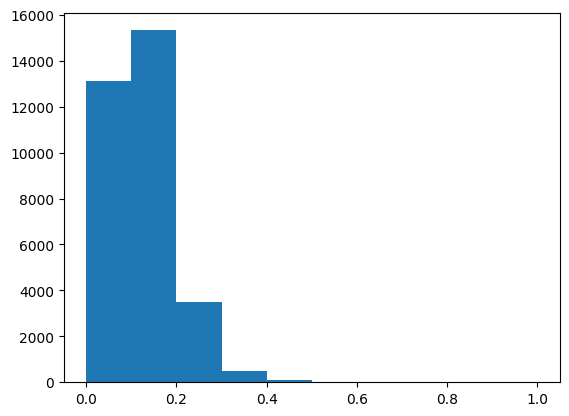

Column: education


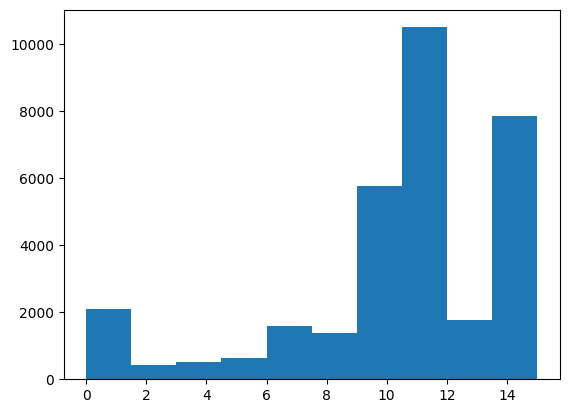

Column: education_num


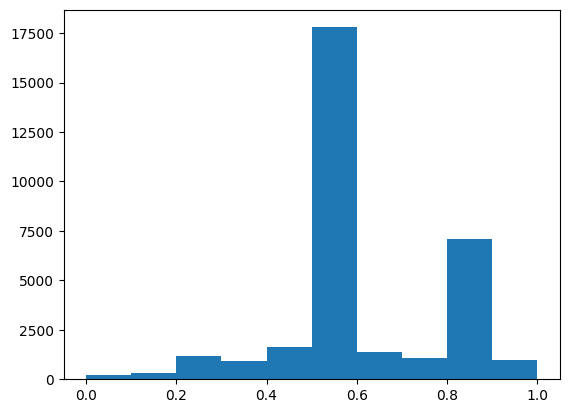

Column: occupation


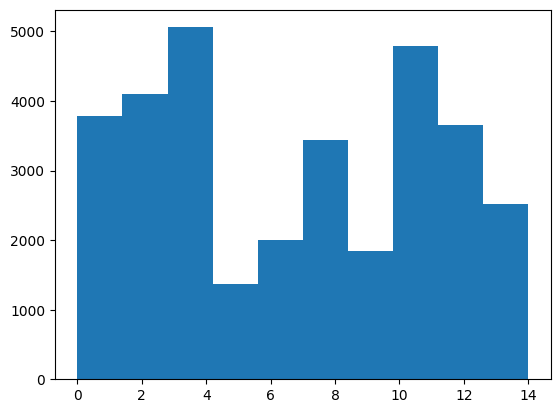

Column: relationship


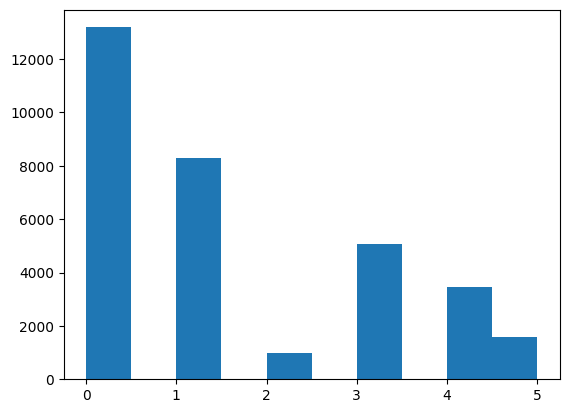

Column: race


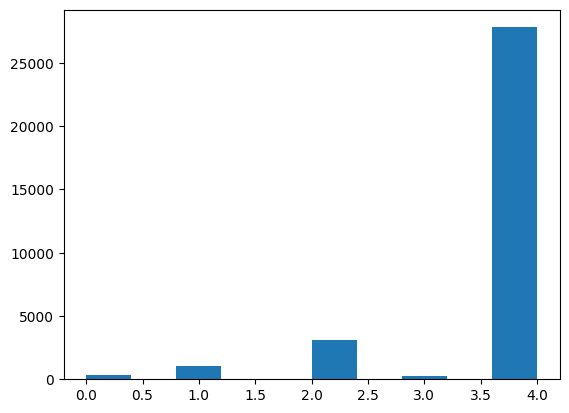

Column: capital_gain


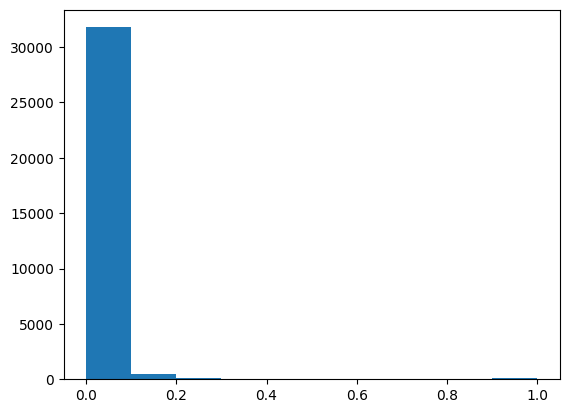

Column: capital_loss


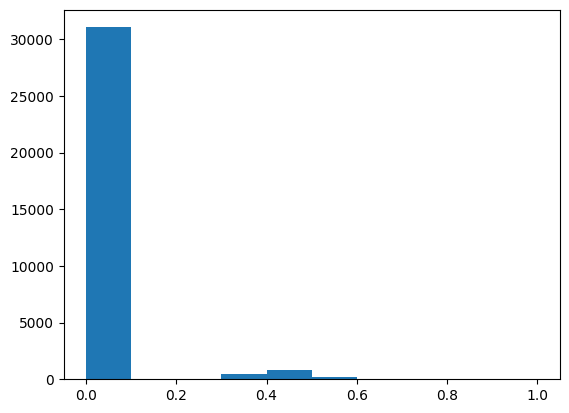

Column: hours_per_week


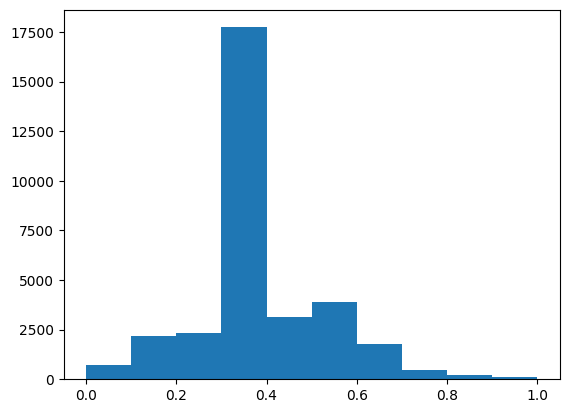

Column: income


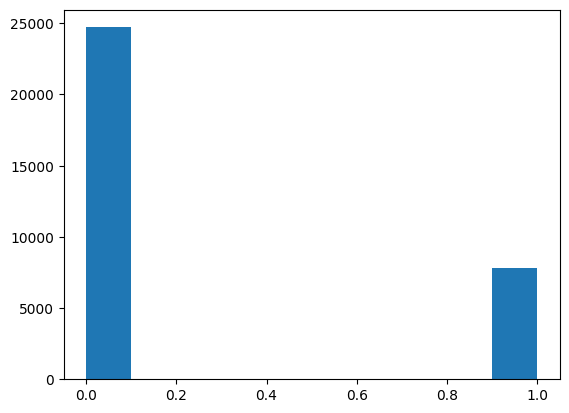

Column: sex_Female


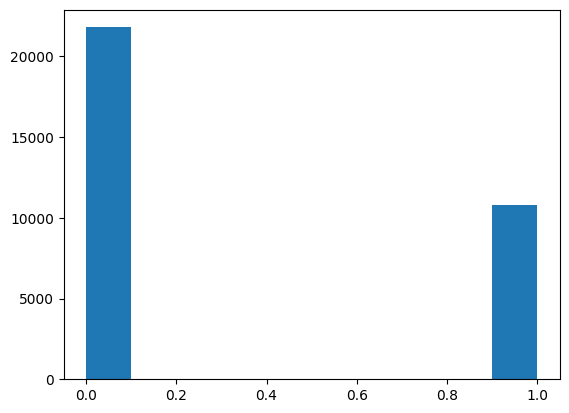

Column: sex_Male


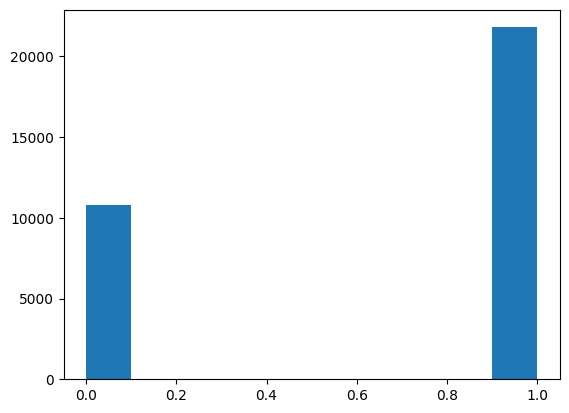

Column: marital_status_new


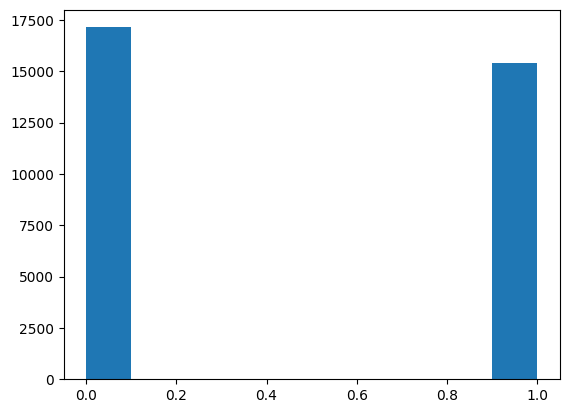

Column: native_country_new


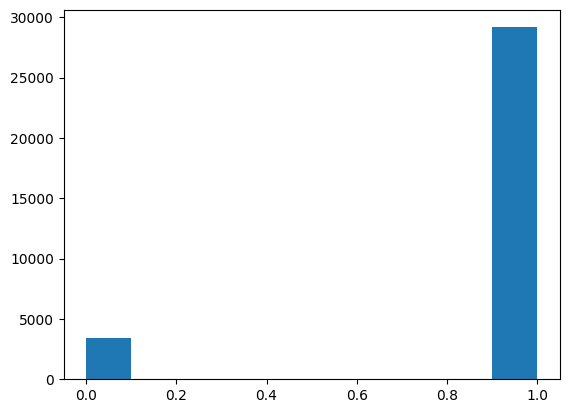

In [37]:
for col in df.columns:
    print('Column:',col)
    plt.hist(df[col])
    plt.show()


Since "age" column is very skewed, we will apply log transformation on "age" column

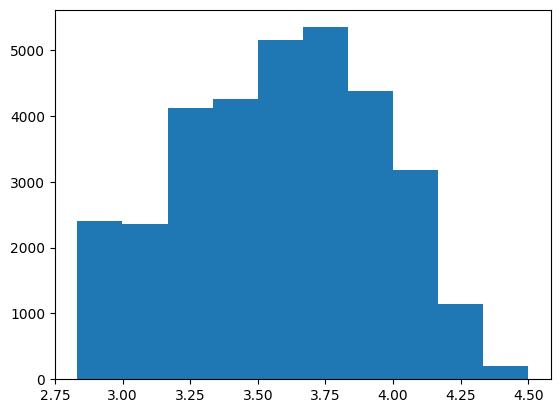

In [38]:
df['log_age'] = np.log(data['age'])
plt.hist(df['log_age'])
plt.show()

Also we will apply "square root" transformation on "occupation" column

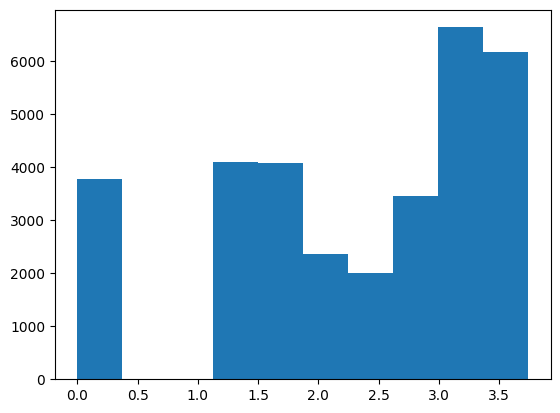

In [39]:
df['root_occupation'] = np.sqrt(df['occupation'])
plt.hist(df['root_occupation'])
plt.show()

Now, we will delete "age" and "occupation" columns

In [40]:
df.drop(columns=['age','occupation'], inplace=True)
df.describe()

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.094438,0.120545,10.298210,0.605379,1.446362,3.665858,0.010777,0.020042,0.402423,0.240810,0.330795,0.669205,0.473481,0.895857,3.589360,2.293588
std,1.107194,0.071685,3.870264,0.171515,1.606771,0.848806,0.073854,0.092507,0.125994,0.427581,0.470506,0.470506,0.499304,0.305451,0.360379,1.102255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.833213,0.000000
25%,3.000000,0.071679,9.000000,0.533333,0.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,1.000000,3.332205,1.732051
50%,3.000000,0.112788,11.000000,0.600000,1.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,1.000000,0.000000,1.000000,3.610918,2.449490
75%,3.000000,0.152651,12.000000,0.733333,3.000000,4.000000,0.000000,0.000000,0.448980,0.000000,1.000000,1.000000,1.000000,1.000000,3.871201,3.162278
max,7.000000,1.000000,15.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.499810,3.741657


# **4. Feature Selection:**

### **Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.**

In [41]:
X = df.drop(columns = ['income'])

In [42]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
iso.fit(X)
ypred = iso.predict(X)
ypred

array([ 1,  1,  1, ...,  1,  1, -1])

In [43]:
df['Outliers'] = ypred
df

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation,Outliers
0,6,0.044302,9,0.800000,1,4,0.021740,0.0,0.397959,0,0,1,0,1,3.663562,0.000000,1
1,5,0.048238,9,0.800000,0,4,0.000000,0.0,0.122449,0,0,1,1,1,3.912023,1.732051,1
2,3,0.138113,11,0.533333,1,4,0.000000,0.0,0.397959,0,0,1,0,1,3.637586,2.236068,1
3,3,0.151068,1,0.400000,0,2,0.000000,0.0,0.397959,0,0,1,1,1,3.970292,2.236068,1
4,3,0.221488,9,0.800000,5,2,0.000000,0.0,0.397959,0,1,0,1,0,3.332205,3.162278,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3,0.166404,7,0.733333,5,4,0.000000,0.0,0.377551,0,1,0,1,1,3.295837,3.605551,-1
32557,3,0.096500,11,0.533333,0,4,0.000000,0.0,0.397959,1,0,1,1,1,3.688879,2.449490,1
32558,3,0.094827,11,0.533333,4,4,0.000000,0.0,0.397959,0,1,0,0,1,4.060443,0.000000,1
32559,3,0.128499,11,0.533333,3,4,0.000000,0.0,0.193878,0,0,1,0,1,3.091042,0.000000,1


In [44]:
df['Outliers'].value_counts()

 1    25650
-1     6911
Name: Outliers, dtype: int64

In [45]:
df.groupby(["Outliers"]).mean()

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation
Outliers,,,,,,,,,,,,,,,,
-1,2.975112,0.131217,8.631168,0.563903,2.317031,3.064245,0.032537,0.055969,0.376340,0.245985,0.541890,0.458110,0.433078,0.623354,3.573332,2.143175
1,3.126589,0.117670,10.747368,0.616554,1.211774,3.827953,0.004913,0.010362,0.409451,0.239415,0.273918,0.726082,0.484366,0.969279,3.593678,2.334115


In [46]:
df.groupby(["Outliers", "native_country_new"]).mean()

workclass    fnlwgt  education  education_num  \
Outliers native_country_new                                                  
-1       0                    3.107952  0.138569   8.935843       0.545294   
         1                    2.894847  0.126775   8.447075       0.575147   
 1       0                    3.091371  0.129124  10.300761       0.584772   
         1                    3.127705  0.117307  10.761524       0.617561   

                             relationship      race  capital_gain  \
Outliers native_country_new                                         
-1       0                       1.777564  2.868613      0.012434   
         1                       2.642990  3.182451      0.044684   
 1       0                       0.682741  3.895939      0.001014   
         1                       1.228542  3.825798      0.005037   

                             capital_loss  hours_per_week    income  \
Outliers native_country_new                                           
-1       0                       0.023005        0.396826  0.193239   
         1                       0.075886        0.363962  0.277855   
 1       0                       0.000000        0.417021  0.211929   
         1                       0.010691        0.409211  0.240286   

                             sex_Female  sex_Male  marital_status_new  \
Outliers native_country_new                                             
-1       0                     0.396466  0.603534            0.483289   
         1                     0.629759  0.370241            0.402739   
 1       0                     0.072335  0.927665            0.653553   
         1                     0.280307  0.719693            0.479004   

                              log_age  root_occupation  
Outliers native_country_new                             
-1       0                   3.567256         2.289415  
         1                   3.577003         2.054814  
 1       0                   3.619729         2.409740  
         1                   3.592852         2.331718

**Remove Outliers**

In [47]:
new_df = df[df['Outliers'] == 1]
new_df.drop(columns = ['Outliers'], inplace=True)
new_df

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation
0,6,0.044302,9,0.800000,1,4,0.02174,0.0,0.397959,0,0,1,0,1,3.663562,0.000000
1,5,0.048238,9,0.800000,0,4,0.00000,0.0,0.122449,0,0,1,1,1,3.912023,1.732051
2,3,0.138113,11,0.533333,1,4,0.00000,0.0,0.397959,0,0,1,0,1,3.637586,2.236068
3,3,0.151068,1,0.400000,0,2,0.00000,0.0,0.397959,0,0,1,1,1,3.970292,2.236068
7,5,0.134036,11,0.533333,0,4,0.00000,0.0,0.448980,1,0,1,1,1,3.951244,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3,0.210253,12,0.866667,0,4,0.00000,0.0,0.397959,1,0,1,1,1,3.970292,1.732051
32555,3,0.202298,15,0.600000,1,4,0.00000,0.0,0.397959,0,0,1,0,1,3.091042,3.316625
32557,3,0.096500,11,0.533333,0,4,0.00000,0.0,0.397959,1,0,1,1,1,3.688879,2.449490
32558,3,0.094827,11,0.533333,4,4,0.00000,0.0,0.397959,0,1,0,0,1,4.060443,0.000000


### **Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.**

In [48]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.dpi'] = 200

#### **Correlation**

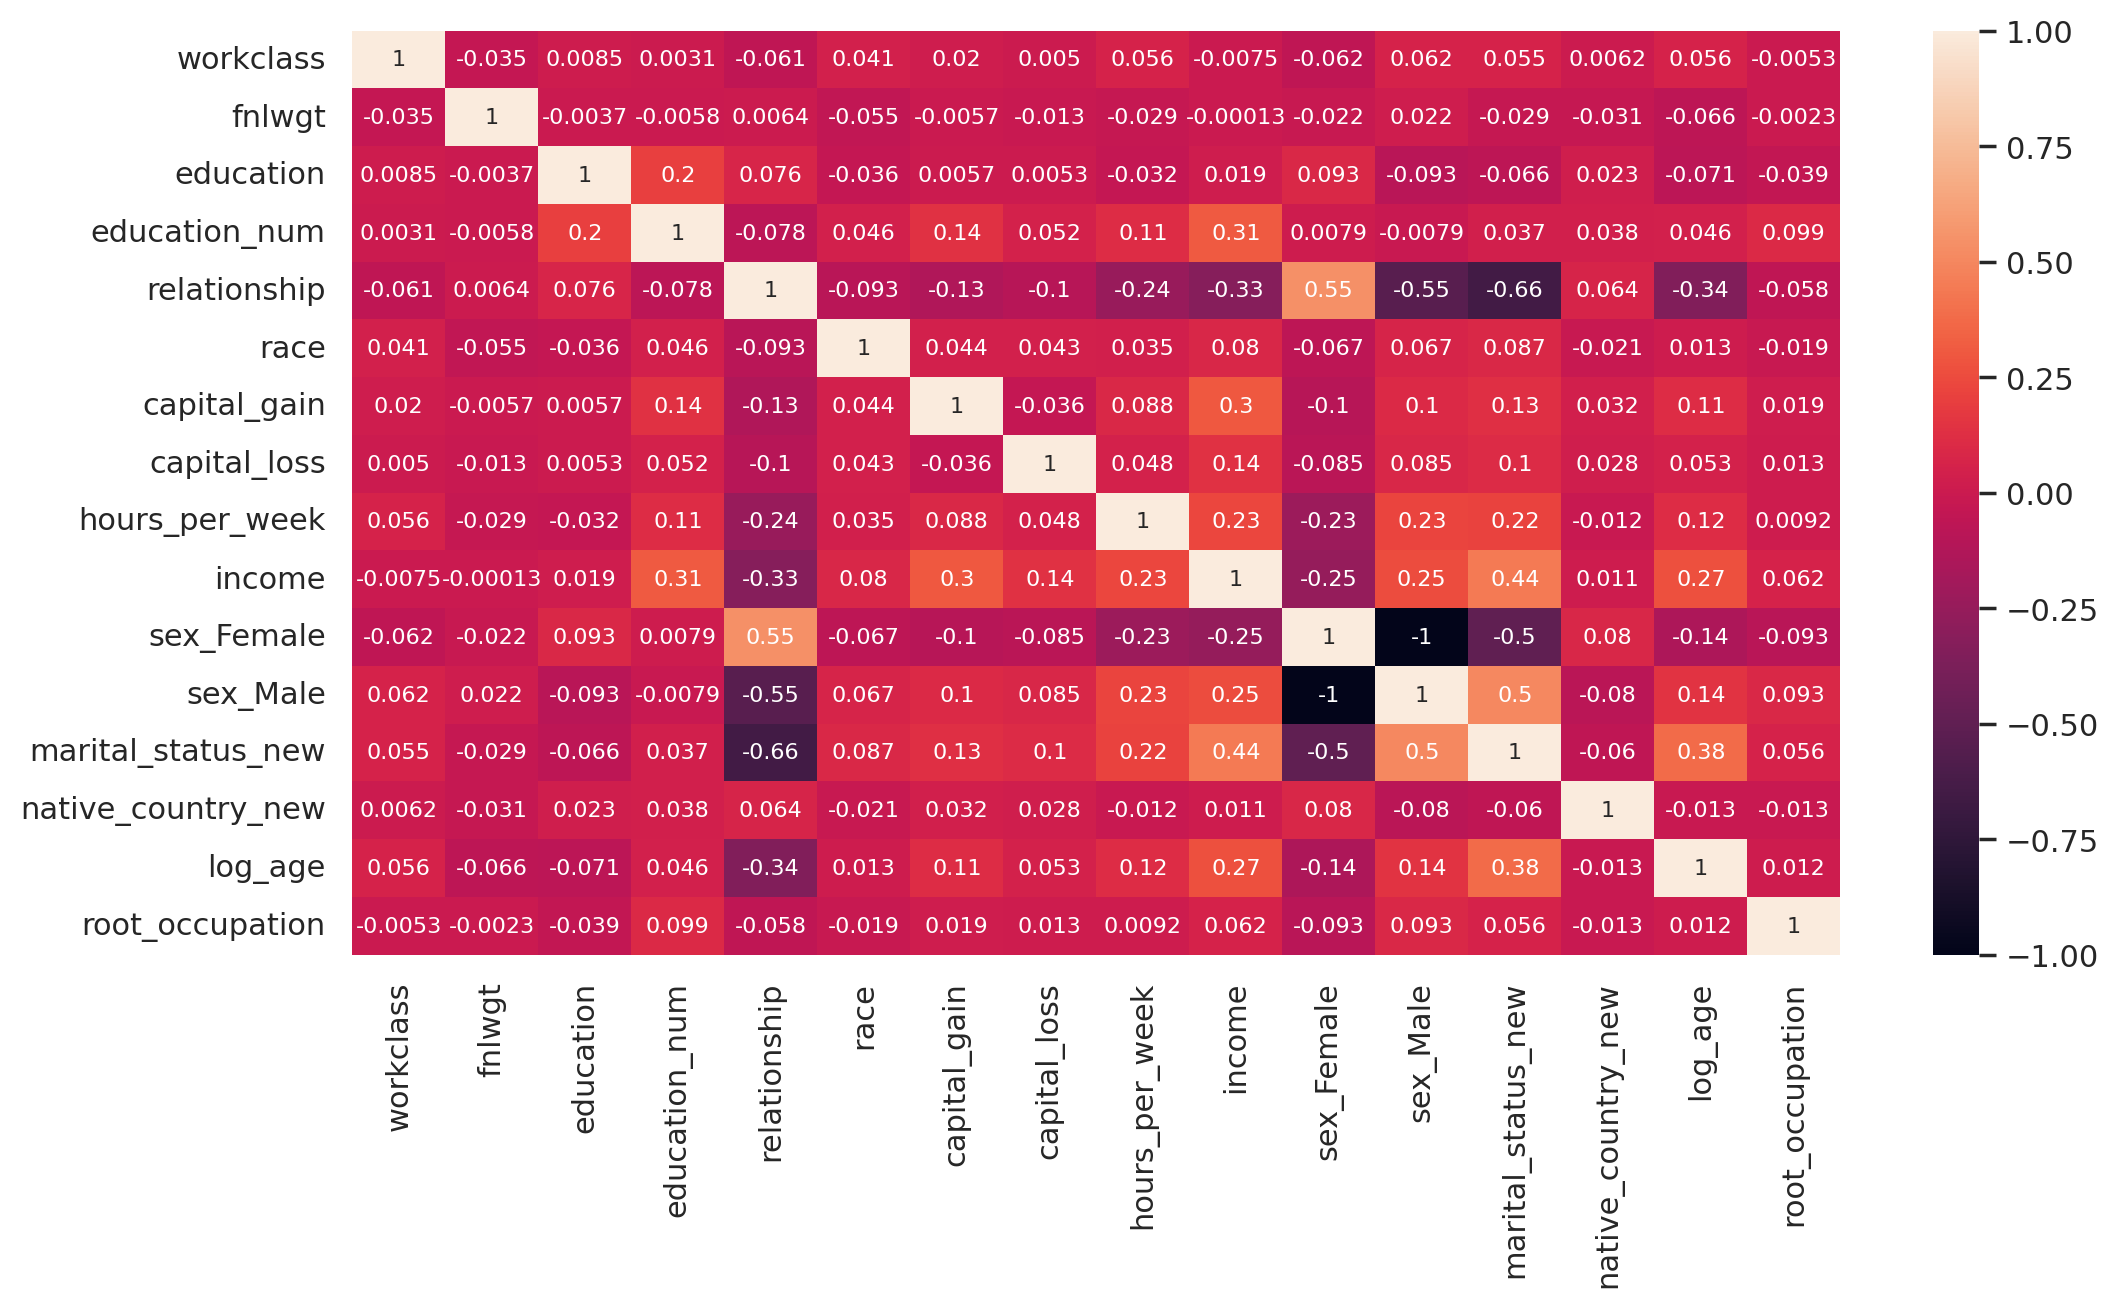

In [49]:
#Correlation
corr = new_df.corr()
sns.heatmap(corr, annot=True,annot_kws={"size":8})
plt.show()

In [50]:
new_df.corr()

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation
workclass,1.000000,-0.034794,0.008457,0.003087,-0.061492,0.041248,0.019525,0.004990,0.056339,-0.007477,-0.061868,0.061868,0.055042,0.006229,0.055855,-0.005306
fnlwgt,-0.034794,1.000000,-0.003678,-0.005784,0.006441,-0.054615,-0.005733,-0.013389,-0.029181,-0.000133,-0.021578,0.021578,-0.029210,-0.030630,-0.066221,-0.002349
education,0.008457,-0.003678,1.000000,0.203040,0.075608,-0.035865,0.005687,0.005277,-0.031765,0.019037,0.092832,-0.092832,-0.066371,0.023453,-0.071022,-0.039218
education_num,0.003087,-0.005784,0.203040,1.000000,-0.077691,0.046406,0.139307,0.051592,0.109885,0.306750,0.007925,-0.007925,0.036985,0.037638,0.045560,0.098671
relationship,-0.061492,0.006441,0.075608,-0.077691,1.000000,-0.092947,-0.131637,-0.100455,-0.242136,-0.326640,0.546506,-0.546506,-0.656137,0.064440,-0.343855,-0.057671
race,0.041248,-0.054615,-0.035865,0.046406,-0.092947,1.000000,0.043836,0.043119,0.035462,0.079925,-0.066636,0.066636,0.086775,-0.020539,0.012937,-0.019168
capital_gain,0.019525,-0.005733,0.005687,0.139307,-0.131637,0.043836,1.000000,-0.035801,0.087912,0.298936,-0.099776,0.099776,0.128775,0.031958,0.111202,0.018955
capital_loss,0.004990,-0.013389,0.005277,0.051592,-0.100455,0.043119,-0.035801,1.000000,0.047925,0.136517,-0.084877,0.084877,0.103801,0.028179,0.053025,0.012986
hours_per_week,0.056339,-0.029181,-0.031765,0.109885,-0.242136,0.035462,0.087912,0.047925,1.000000,0.226564,-0.225836,0.225836,0.218257,-0.011563,0.115371,0.009153
income,-0.007477,-0.000133,0.019037,0.306750,-0.326640,0.079925,0.298936,0.136517,0.226564,1.000000,-0.252826,0.252826,0.438659,0.011467,0.270777,0.062221


#### **Predictive Power Score**

In [51]:
pps.matrix(new_df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,workclass,workclass,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,workclass,fnlwgt,0.000000,regression,True,mean absolute error,0.048859,0.049210,DecisionTreeRegressor()
2,workclass,education,0.000000,regression,True,mean absolute error,2.345800,2.451604,DecisionTreeRegressor()
3,workclass,education_num,0.000000,regression,True,mean absolute error,0.110627,0.112035,DecisionTreeRegressor()
4,workclass,relationship,0.000000,regression,True,mean absolute error,1.117400,1.186504,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
251,root_occupation,sex_Male,0.000000,regression,True,mean absolute error,0.272200,0.322728,DecisionTreeRegressor()
252,root_occupation,marital_status_new,0.085181,regression,True,mean absolute error,0.491000,0.449176,DecisionTreeRegressor()
253,root_occupation,native_country_new,0.000000,regression,True,mean absolute error,0.034200,0.065284,DecisionTreeRegressor()
254,root_occupation,log_age,0.024531,regression,True,mean absolute error,0.287925,0.280862,DecisionTreeRegressor()


In [52]:
pps_matrix = pps.matrix(new_df).pivot(columns='x', index='y', values='ppscore')
pps_matrix

x,capital_gain,capital_loss,education,education_num,fnlwgt,hours_per_week,income,log_age,marital_status_new,native_country_new,race,relationship,root_occupation,sex_Female,sex_Male,workclass
y,,,,,,,,,,,,,,,,
capital_gain,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
capital_loss,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
education,0.000000,0.000000,1.000000,0.998295,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
education_num,0.000000,0.000000,0.996866,1.000000,0.000000,0.000000,0.020016,0.000000,0.000000,0.0,0.0,0.000000,0.162587,0.000000,0.000000,0.000000
fnlwgt,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
hours_per_week,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
income,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
log_age,0.008648,0.000000,0.025477,0.025647,0.000000,0.012007,0.052645,1.000000,0.075761,0.0,0.0,0.163520,0.024531,0.009171,0.009171,0.027862
marital_status_new,0.044392,0.006368,0.007445,0.007783,0.025397,0.049814,0.177875,0.150502,1.000000,0.0,0.0,0.948630,0.085181,0.250334,0.250334,0.021034


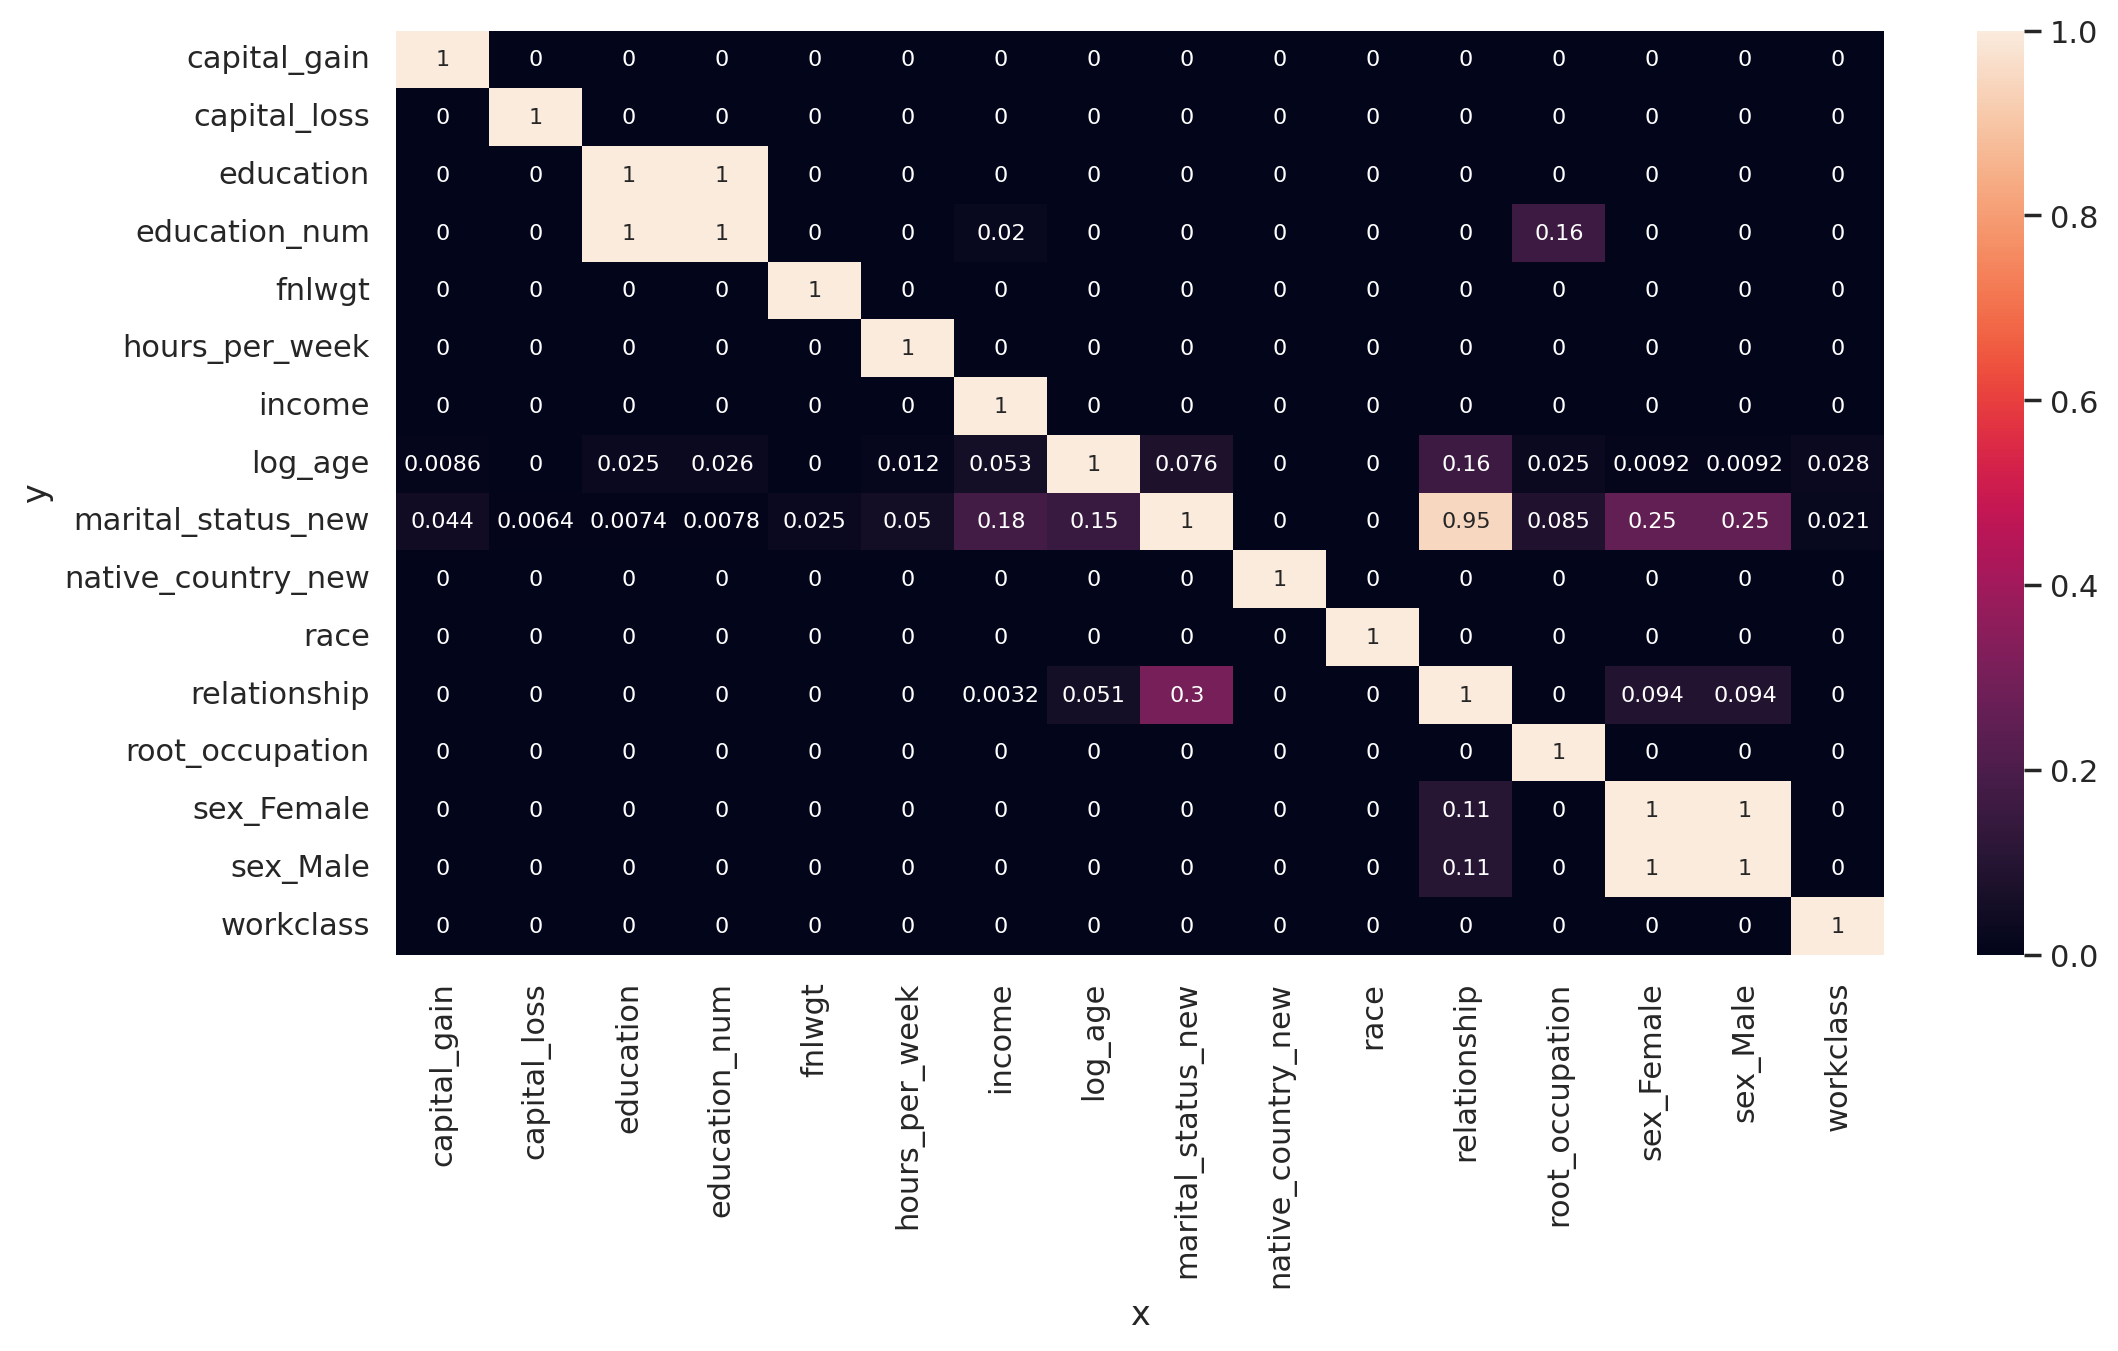

In [53]:
# Heat_Map of PPS
sns.heatmap(pps_matrix, annot=True,annot_kws={"size":8},)
plt.show()

* Correlation between the columns "education" and "education_num" is just $0.22$, but predictive power score is $1$. i.e. thery very extremely high non-linear relation between these two columns.
* Predictive power score of "maritial_status_new" from "relationship" is also very high $0.95$, but correlation is moderate $-0.71$